# General Assembly - Project 3:  Webs API & Classification
## Notebook 4: Model Selection
### DSI19 / Jordan David Nalpon

### Notebook 3 Index
---
* [Import Libraries](#lib)
* [Import CSV Files](#csv)
* [Grid Search](#grid)
    * [Grid Search - Count Vectorize](#cv)
    * [Grid Search - TF-IDF](#idf)
 
* [Results](#results)
* [Model Selection](#model)
* [Conclusion](#Conclusion)
---
<a name="index"></a>

<a name="lib"></a>
### Import Libraries

In [62]:
import requests
import time
import pandas as pd
import numpy as np
import ast
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
    GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

<a name="csv"></a>
### Import CSV

In [2]:
X_train = pd.read_csv('../01_data/notebook3_X_train.csv')
X_test = pd.read_csv('../01_data/notebook3_X_test.csv')
y_train = pd.read_csv('../01_data/notebook3_y_train.csv')
y_test = pd.read_csv('../01_data/notebook3_y_test.csv')

In [3]:
X_train.head()

,Unnamed: 0,stem,lem
0,1832,i eam that i kiss someon new it' silli i know ...,i eamed that i kissed someone new it's silly i...
1,1590,as a kid i actual like have my mom take my tem...,as a kid i actually liked having my mom take m...
2,1739,dig up my great great grandfather' grave for h...,digging up my great great grandfather's grave ...
3,758,by not know that testicular torsion wa not pa...,by not knowing that testicular torsion was no...
4,1425,i ve hook up with my fiancé s best man and one...,i ve hooked up with my fiancé s best mans and ...


In [4]:
X_train.shape

(1488, 3)

In [5]:
y_train.head()

,Unnamed: 0,is_tifu
0,1832,0
1,1590,0
2,1739,0
3,758,1
4,1425,0


In [6]:
y_test.head()

,Unnamed: 0,is_tifu
0,826,1
1,1458,0
2,144,1
3,907,1
4,1683,0


In [7]:
#remove Unnamed column
X_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
X_test.drop(['Unnamed: 0'], axis = 1, inplace = True)
y_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
y_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1488, 2)
(496, 2)
(1488, 1)
(496, 1)


<a name="grid"></a>
## Grid Search

### Gridsearch - Count Vectorize<a name="cv"></a>

In [9]:
steps_list_gr_cv= [
    [('cv',CountVectorizer()),('scaler',StandardScaler(with_mean=False)),('knn',KNeighborsClassifier())], 
    [('cv',CountVectorizer()),('scaler',StandardScaler(with_mean=False)),('logreg',LogisticRegression())],
    [('cv',CountVectorizer()),('multi_nb',MultinomialNB())],
]

In [10]:
steps_titles = ['knn','logreg','multi_nb']

In [11]:
pipe_params_cv = [
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]}
]

In [12]:
grid_results = pd.DataFrame(columns=['model','best_params','train_accuracy','test_accuracy','tn','fp','fn','tp'])
grid_results.head()

,model,best_params,train_accuracy,test_accuracy,tn,fp,fn,tp


In [13]:
X_train_pre_post = X_train['lem']
X_test_pre_post = X_test['lem']

In [14]:
for i in tqdm(range(len(steps_list_gr_cv))):           # timed loop through index of number of steps
    pipe = Pipeline(steps=steps_list_gr_cv[i])         # configure pipeline for each model
    grid = GridSearchCV(pipe, pipe_params_cv[i], cv=3) # fit GridSearchCV to model and model's params

    model_results = {}

    grid.fit(X_train_pre_post, y_train.values.ravel())
    
    print('Model: ',steps_titles[i])
    model_results['model'] = steps_titles[i]

    print('Best Params: ', grid.best_params_)
    model_results['best_params'] = grid.best_params_

    print(grid.score(X_train_pre_post, y_train), '\n')
    model_results['train_accuracy'] = grid.score(X_train_pre_post, y_train)
    
    print(grid.score(X_test_pre_post, y_test), '\n')
    model_results['test_accuracy'] = grid.score(X_test_pre_post, y_test)

    # Display the confusion matrix results showing true/false positive/negative
    tn, fp, fn, tp = confusion_matrix(y_test, grid.predict(X_test_pre_post)).ravel() 
    print("True Negatives: %s" % tn)
    model_results['tn'] = tn

    print("False Positives: %s" % fp)  
    model_results['fp'] = fp

    print("False Negatives: %s" % fn)
    model_results['fn'] = fn

    print("True Positives: %s" % tp, '\n')
    model_results['tp'] = tp

    grid_results = grid_results.append(model_results, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Model:  knn
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
0.49731182795698925 

0.49798387096774194 



 33%|███▎      | 1/3 [00:04<00:08,  4.40s/it]

True Negatives: 247
False Positives: 0
False Negatives: 249
True Positives: 0 

Model:  logreg
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
1.0 



 67%|██████▋   | 2/3 [00:12<00:06,  6.49s/it]

0.8588709677419355 

True Negatives: 225
False Positives: 22
False Negatives: 48
True Positives: 201 

Model:  multi_nb
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
0.9549731182795699 



100%|██████████| 3/3 [00:15<00:00,  5.12s/it]

0.8326612903225806 

True Negatives: 192
False Positives: 55
False Negatives: 28
True Positives: 221 



In [15]:
grid_results_cv = grid_results

In [16]:
grid_results.sort_values('test_accuracy',ascending=False)

,model,best_params,train_accuracy,test_accuracy,tn,fp,fn,tp
1,logreg,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",1.000000,0.858871,225,22,48,201
2,multi_nb,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.954973,0.832661,192,55,28,221
0,knn,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.497312,0.497984,247,0,249,0


### Gridsearch - TF-IDF <a name="idf"></a>

In [17]:
steps_list_gr_tf = [ # list of pipeline steps for each model combo
    [('tf',TfidfVectorizer()),('scaler',StandardScaler(with_mean=False)),('knn',KNeighborsClassifier())], 
    [('tf',TfidfVectorizer()),('scaler',StandardScaler(with_mean=False)),('logreg',LogisticRegression())],
    [('tf',TfidfVectorizer()),('multi_nb',MultinomialNB())]
]

In [18]:
steps_titles = ['multi_nb','knn','logreg']

In [19]:
pipe_params_tf = [
    {"tf__stop_words":['english'], "tf__ngram_range":[(1,1),(1,2)]},
    {"tf__stop_words":['english'], "tf__ngram_range":[(1,1),(1,2)]},
    {"tf__stop_words":['english'], "tf__ngram_range":[(1,1),(1,2)]}
]

In [20]:
# instantiate results DataFrame

grid_results = pd.DataFrame(columns=['model','best_params','train_accuracy','test_accuracy','tn','fp','fn','tp'])
grid_results.head()

,model,best_params,train_accuracy,test_accuracy,tn,fp,fn,tp


In [21]:
X_train_pre_post = X_train['lem']
X_test_pre_post = X_test['lem']

In [22]:
for i in tqdm(range(len(steps_list_gr_tf))):           # timed loop through index of number of steps
    pipe = Pipeline(steps=steps_list_gr_tf[i])         # configure pipeline for each model
    grid = GridSearchCV(pipe, pipe_params_tf[i], cv=3) # fit GridSearchCV to model and model's params

    model_results = {}

    grid.fit(X_train_pre_post, y_train.values.ravel())
    
    print('Model: ',steps_titles[i])
    model_results['model'] = steps_titles[i]

    print('Best Params: ', grid.best_params_)
    model_results['best_params'] = grid.best_params_

    print(grid.score(X_train_pre_post, y_train), '\n')
    model_results['train_accuracy'] = grid.score(X_train_pre_post, y_train)
    
    print(grid.score(X_test_pre_post, y_test), '\n')
    model_results['test_accuracy'] = grid.score(X_test_pre_post, y_test)

    tn, fp, fn, tp = confusion_matrix(y_test, grid.predict(X_test_pre_post)).ravel()
    print("True Negatives: %s" % tn)
    model_results['tn'] = tn

    print("False Positives: %s" % fp)
    model_results['fp'] = fp

    print("False Negatives: %s" % fn)
    model_results['fn'] = fn

    print("True Positives: %s" % tp, '\n')
    model_results['tp'] = tp

    grid_results = grid_results.append(model_results, ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Model:  multi_nb
Best Params:  {'tf__ngram_range': (1, 1), 'tf__stop_words': 'english'}
0.49731182795698925 

0.49798387096774194 



 33%|███▎      | 1/3 [00:03<00:07,  3.70s/it]

True Negatives: 247
False Positives: 0
False Negatives: 249
True Positives: 0 

Model:  knn
Best Params:  {'tf__ngram_range': (1, 1), 'tf__stop_words': 'english'}
1.0 



 67%|██████▋   | 2/3 [00:10<00:05,  5.74s/it]

0.8770161290322581 

True Negatives: 212
False Positives: 35
False Negatives: 26
True Positives: 223 

Model:  logreg
Best Params:  {'tf__ngram_range': (1, 1), 'tf__stop_words': 'english'}
0.9381720430107527 



100%|██████████| 3/3 [00:14<00:00,  4.73s/it]

0.8145161290322581 

True Negatives: 171
False Positives: 76
False Negatives: 16
True Positives: 233 



In [23]:
grid_results_tf = grid_results

<a name="results"></a>
### Results

In [25]:
grid_results_tf['tt_gap'] = grid_results_tf['train_accuracy'] - grid_results_tf['test_accuracy']
grid_results_cv['tt_gap'] = grid_results_cv['train_accuracy'] - grid_results_cv['test_accuracy']

In [27]:
grid_results_tf['ba_gap'] = grid_results_tf['test_accuracy'] - y_train.is_tifu.value_counts(normalize=True)[1]
grid_results_cv['ba_gap'] = grid_results_cv['test_accuracy'] - y_train.is_tifu.value_counts(normalize=True)[1]

In [28]:
grid_results_cv.sort_values('test_accuracy',ascending=False)

,model,best_params,train_accuracy,test_accuracy,tn,fp,fn,tp,tt_gap,ba_gap
1,logreg,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",1.000000,0.858871,225,22,48,201,0.141129,0.356183
2,multi_nb,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.954973,0.832661,192,55,28,221,0.122312,0.329973
0,knn,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.497312,0.497984,247,0,249,0,-0.000672,-0.004704


In [29]:
grid_results_tf.sort_values('test_accuracy',ascending=False)

,model,best_params,train_accuracy,test_accuracy,tn,fp,fn,tp,tt_gap,ba_gap
1,knn,"{'tf__ngram_range': (1, 1), 'tf__stop_words': ...",1.000000,0.877016,212,35,26,223,0.122984,0.374328
2,logreg,"{'tf__ngram_range': (1, 1), 'tf__stop_words': ...",0.938172,0.814516,171,76,16,233,0.123656,0.311828
0,multi_nb,"{'tf__ngram_range': (1, 1), 'tf__stop_words': ...",0.497312,0.497984,247,0,249,0,-0.000672,-0.004704


<a name="model"></a>
### Model Selection

Based on the results above, CountVectorized LogisticRegression and TF-IDF KNN performed the best amongst the models.

1. __CountVectorizer LogisticRegression__ (Test Accuracy: 0.86)
    - cv__ngram_range': (1, 1)
    - cv__stop_words='english
    <br>
    <br>

2. __TF-IDF K-Nearest Neighbors__ (Test Accuracy: 0.88)
    - tf__ngram_range': (1, 1)
    - tf__stop_words='english
    
These two models beat the baseline accuracy of 0.50 and the highest scoring models.

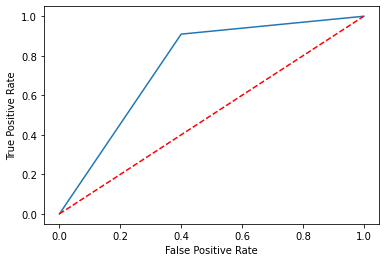

In [71]:
#CountVectorized AUC-ROC Curve

#normalizing the x and y axis
norm_x = (grid_results_cv['fp']-min(grid_results_cv['fp']))/(max(grid_results_cv['fp'])-min(grid_results_cv['fp']))
norm_y = (grid_results_cv['tp']-min(grid_results_cv['tp']))/(max(grid_results_cv['tp'])-min(grid_results_cv['tp']))

# plotting the graph
plt.plot(norm_x,norm_y)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

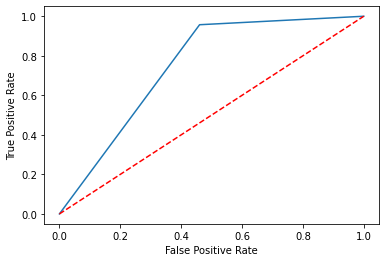

In [72]:
#TF-IDF AUC-ROC Curve

#normalizing the x and y axis
norm_x = (grid_results_tf['fp']-min(grid_results_tf['fp']))/(max(grid_results_tf['fp'])-min(grid_results_tf['fp']))
norm_y = (grid_results_tf['tp']-min(grid_results_tf['tp']))/(max(grid_results_tf['tp'])-min(grid_results_tf['tp']))

# plotting the graph
plt.plot(norm_x,norm_y)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

The 2 models also have very similar area with using the AUC-ROC curve. This indicates that both models will do similarly well when presented with a text post.

<p style="color:red">  
    Instead of eye-balling, you can use sklearn to produce the actual roc_auc_score
</p>

<p style="color:red">  
    <b>Does the student interpret the results of their model for purposes of inference? Is domain knowledge demonstrated when interpreting results?</b><br>   
    <ul style="color:red">
        <li>Generate confusion matrix</li>
        <li>Describe what the 4 metrics are. ie: 200tp means 200 "republican" were correctly classified</li>
        <li>Generate <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">classification report</a></li>
        <li>Any other relevant  <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics">classification metric</a></li>
        <li>Explain what the scores mean in your project's context.</li>
        <li>Compare the score against your baseline.</li>
        <li>Plot <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py">ROC</a></li>
        <li>Explain your ROC curve <a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc">read this</a></li>
        <li>In general, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=auc#sklearn.metrics.roc_auc_score">AUC score</a> is the best scorer for classification but only works for binary classification like this project. For multi class, you can do a one-versus-rest model to generate the score and curve if necessary.</li>
    </ul>
</p>
<p style="color:red"> 
    For NLP classification projects like this, you can additionally look into
    <ul style="color:red">
        <li>Most relevant words for each class using coef / feature_importance</li>
        <li>Examples of (mis)classified entries</li>
    </ul>
</p>


<p style="color:red">  
    <b>Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: Bayes and one other model)?</b><br>   
    You didnt do MNB model! That's the generic goto model to try first for bag-of-words text classification projects like this.
</p>


<a name="conclusion"></a>
### Conclusion

We are able to find 2 ideal machine learning models using NLP and gridsearch. Despite having 2 similar styled subreddits and their formatting removed, we are able to use NLP and grid to find patterns in the words used in both subreddits

<p style="color:red">  
    <b>Conclusion and Recommendations</b><br>   
    You need to address the points in the rubric...
</p>